<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2022/blob/master/03-linear-classification/Classification_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1 (2 points + 1 bonus point + 1 super-bonus point)

(Titanic data again)

Build a model with `sklearn`'s `LogisticRegression` to get the accuracy of at least 0.80 (0.82 for the bonus point, 0.85 for the super-bonus point) on the test set.

Some (optional) suggestions:
- Add new features (e.g. missing value indicator columns)
- Fill missing values
- Encode categorical features (e.g. one-hot encoding)
- Scale the features (e.g. with standard or robust scaler)
- Think of other ways of preprocessing the features (e.g. `Fare` $\to$ `log(Fare)`)
- Try adding polynomial features



In [1]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv

--2023-10-19 19:54:30--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: 'train.csv'

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.04s   

2023-10-19 19:54:31 (1.30 MB/s) - 'train.csv' saved [60302/60302]



In [2]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


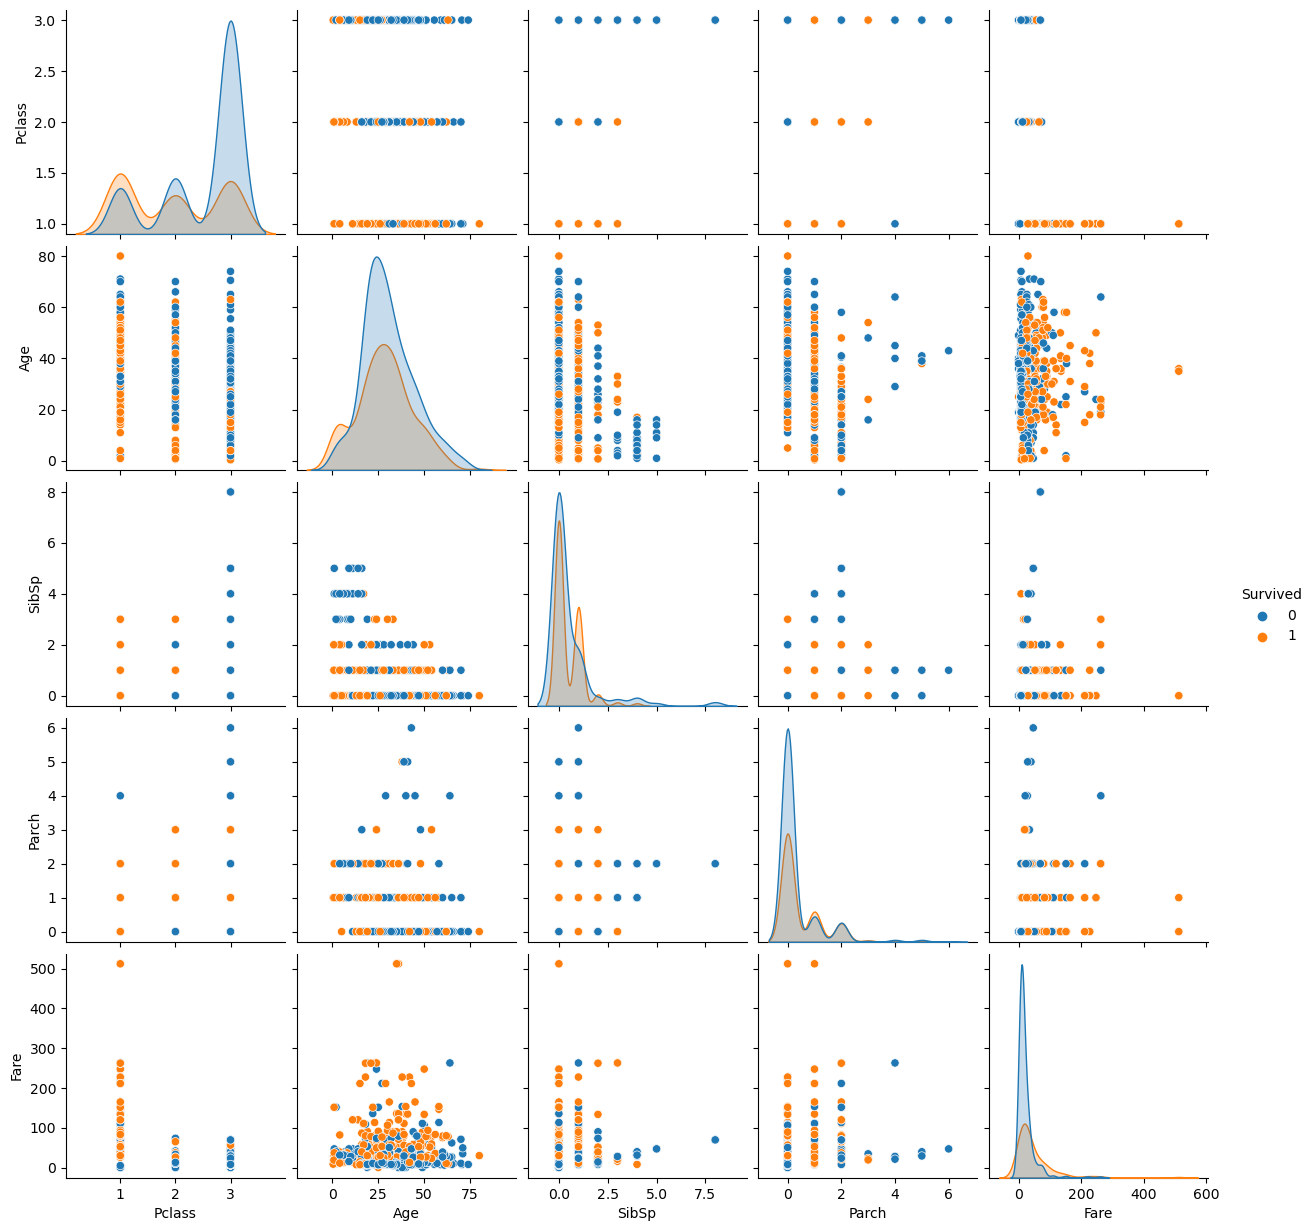

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.pairplot(data, hue='Survived')
plt.show()

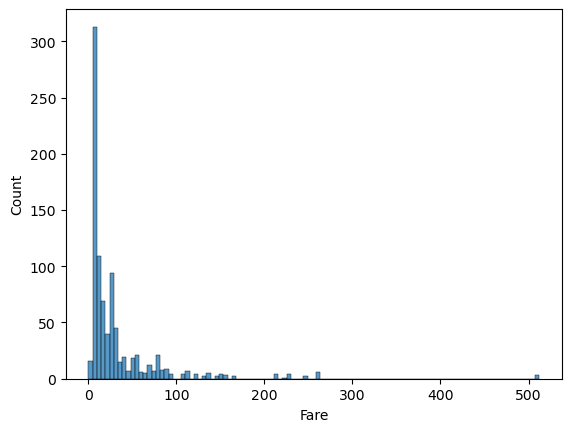

0.0

In [68]:
sns.histplot(data.Fare)
plt.show()
min(data.Fare)

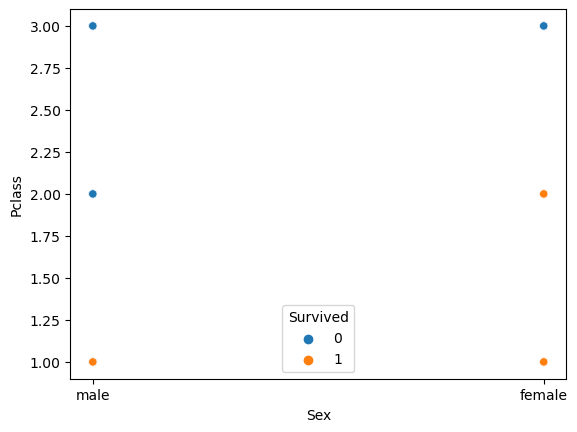

In [188]:
sns.scatterplot(x=data.Sex, y=data.Pclass, hue=data.Survived)
plt.show()

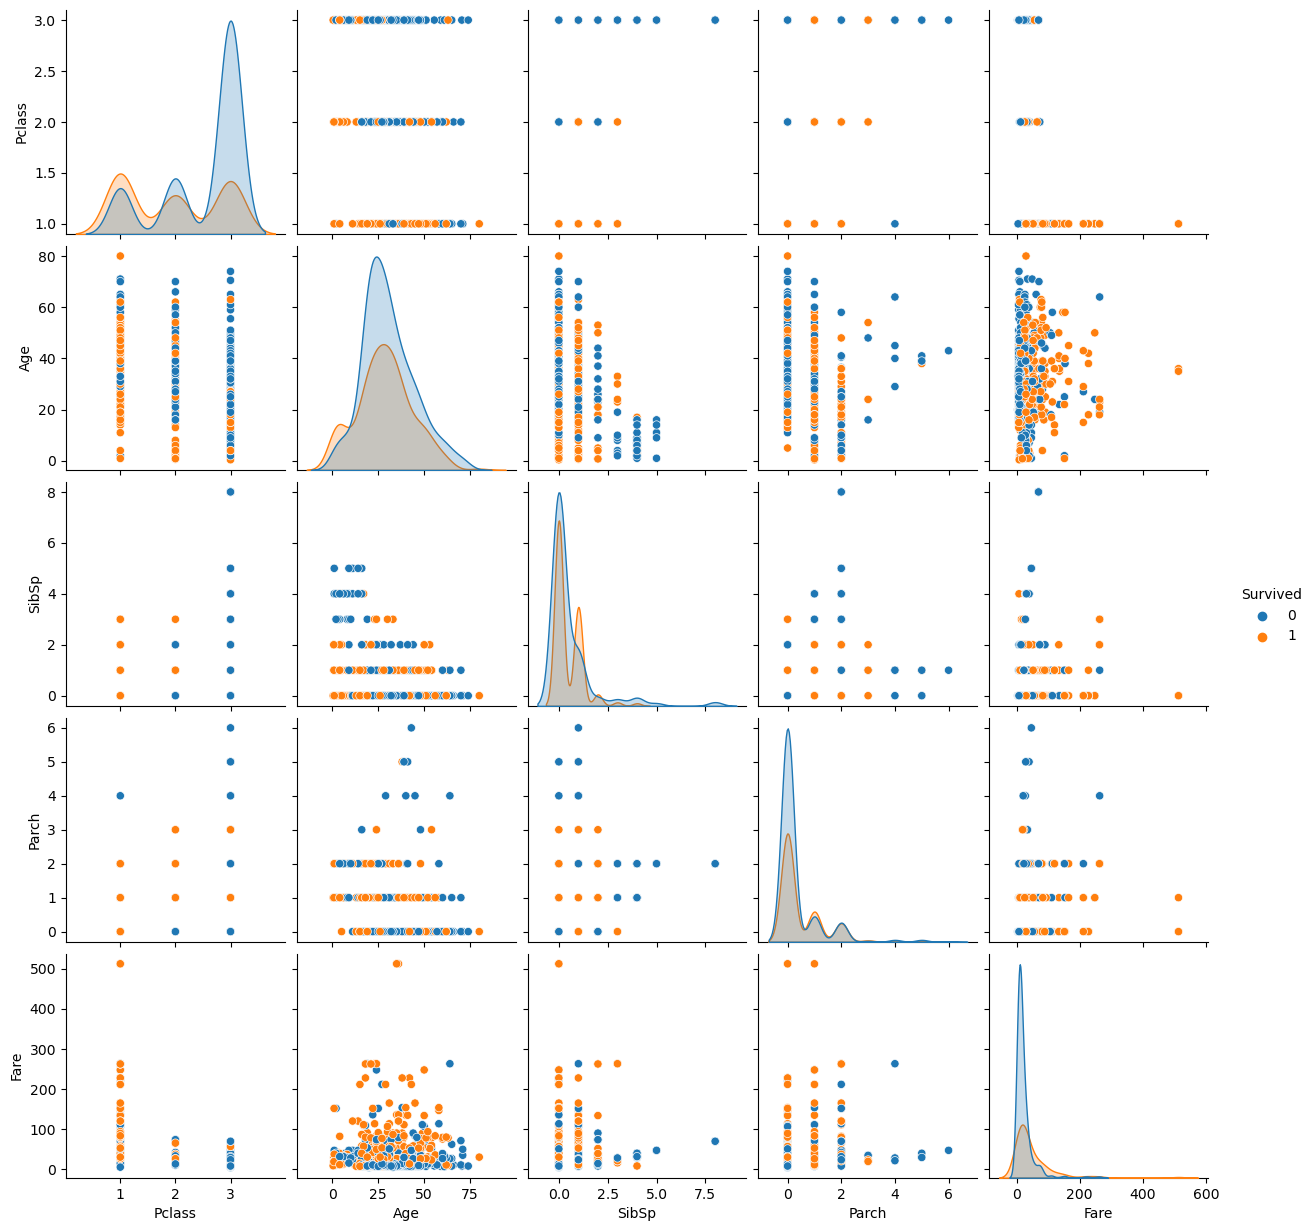

In [80]:
df = data.copy()
df['Fare'] = df['Fare'].apply(lambda fare: fare if fare != 0 else df['Fare'].median())
sns.pairplot(df, hue='Survived')
plt.show()

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

def feature_selection_and_preprocessing(dataset):
  # <YOUR CODE>
  # E.g.:
  features = dataset[["Fare", "SibSp", "Parch", "Pclass", 'Sex']].copy()
  features["Age"] = dataset.Age.fillna(dataset.Age.median())
  features['Age'] = np.log(features.Age)
  features['Fare'] = features['Fare'].apply(lambda fare: fare if fare != 0 else features['Fare'].median())
  features['ParchxFare'] = features['Parch']**2 + features['Fare']**2
  features['ParchxAge'] = features['Parch']**2 + features['Age']**2
  features['SibSpxParch'] = features['SibSp']**2 * features['Parch']**2
  features['FarexAge'] = features['Fare']**2 + features['Age']**2
  features['Sex'] = features['Sex'].apply(lambda sex: 1 if sex=='female' else 2)
  features['SexPclass'] = features['Sex']**2 + features['Pclass']**2
  features['SexSibSp'] = features['Sex']**2 + features['SibSp']**2

  features['constant'] = 1
  

  features['Embarked'] = data.Embarked.fillna('unknown')
  features = features[['Fare', 'Pclass', 'Age', 'Sex', 'Embarked', 'constant', 'ParchxFare', 'SibSpxParch', 'ParchxAge', 'FarexAge', 'SexPclass']]

  return features

model = make_pipeline(
    # <YOUR CODE>
    # E.g.
    make_column_transformer(
        (StandardScaler(), ['ParchxFare', 'ParchxAge', 'FarexAge']),
        (OneHotEncoder(sparse=True), ['Embarked']),
        # (PolynomialFeatures(degree=2), ['Fare']),
        remainder='passthrough',
        
    ),
    LogisticRegression(
      max_iter=1000,
      class_weight='auto')
)


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train, data_test = train_test_split(data, test_size=200, random_state=42)

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

train_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    )
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)

print("Train accuracy:", accuracy_score(
    data_train['Survived'],
    train_predictions
))
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Train accuracy: 0.8219971056439942
Test accuracy: 0.825
